1.	First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).

2.	Print the route e.g. NYC -> DC -> ATL etc -> L.A.

3.	Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

4.	Print the route e.g. NYC -> DC -> ATL etc -> L.A.

5.	Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.

6.	Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
from decimal import Decimal
import random
import string
import matplotlib.ticker as mtick
from collections import deque
import math

from platform import python_version

print("python version",python_version())

import os
import platform


python version 3.8.5


# Set up the graph in pythons dictionary  

In [2]:
# the graph
graph = {}

#store neighbor and cost 
graph['NYC'] = {} #add node
graph['NYC']['DC'] = 2 #add neighbor and weight
graph['NYC']['Indianapolis'] = 11 #add neighbor and weight
graph['NYC']['Pittsburg'] = 7 #add neighbor and weight

#add rest of nodes and cost 
graph['DC'] = {}
graph['DC']['Atlanta'] = 2

graph['Atlanta'] = {}
graph['Atlanta']['New Orleans'] = 2

graph['New Orleans'] = {}
graph['New Orleans']['Dallas'] = 2

graph['Dallas'] = {}
graph['Dallas']['Albuquerque'] = 2

graph['Albuquerque'] = {}
graph['Albuquerque']['Phoenix'] = 2

graph['Phoenix'] = {}
graph['Phoenix']['Las Vegas'] = 2
graph['Phoenix']['San Diego'] = 5

graph['Las Vegas'] = {}
graph['Las Vegas']['San Diego'] = 2
graph['Las Vegas']['Los Angeles'] = 5


graph['Indianapolis'] = {}
graph['Indianapolis']['Kansas City'] = 8

graph['Kansas City'] = {}
graph['Kansas City']['Denver'] = 7

graph['Denver'] = {}
graph['Denver']['Salt Lake City'] = 6

graph['Salt Lake City'] = {}
graph['Salt Lake City']['Las Vegas'] = 9

graph['Pittsburg'] = {}
graph['Pittsburg']['Cincinnati'] = 6


graph['Cincinnati'] = {}
graph['Cincinnati']['St Louis'] = 8

graph['St Louis'] = {}
graph['St Louis']['Oklahoma City'] = 7

graph['Oklahoma City'] = {}
graph['Oklahoma City']['Albuquerque'] = 9



graph['San Diego'] = {}
graph['San Diego']['Los Angeles'] = 2

graph['Los Angeles'] = {}

# the costs table
infinity = float("inf")
costs = {}
costs["DC"] = 2
costs["Indianapolis"] = 11
costs["Pittsburg"] = 7

costs["Atlanta"] = infinity
costs["Kansas City"] = infinity
costs["Cincinnati"] = infinity
costs["New Orleans"] = infinity
costs["Denver"] = infinity
costs["St Louis"] = infinity
costs["Dallas"] = infinity
costs["Oklahoma City"] = infinity

costs["Salt Lake City"] = infinity
costs["Albuquerque"] = infinity

costs["Phoenix"] = infinity
costs["Las Vegas"] = infinity
costs["San Diego"] = infinity
costs["Los Angeles"] = infinity


# the parents table
parents = {}
parents["DC"] = "NYC"
parents["Indianapolis"] = "NYC"
parents["Pittsburg"] = "NYC"

parents["Atlanta"] = None
parents["Kansas City"] = None
parents["Cincinnati"] = None
parents["New Orleans"] = None
parents["Denver"] = None
parents["Oklahoma City"] = None
parents["St Louis"] = None
parents["Dallas"] = None
parents["Albuquerque"] = None
parents["Salt Lake City"] = None
parents["Phoenix"] = None
parents["Las Vegas"] = None
parents["San Diego"] = None
parents["Los Angeles"] = None

# 1.	First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).

BFS function 

refrence:
https://pythoninwonderland.wordpress.com/2017/03/18/how-to-implement-breadth-first-search-in-python/

In [3]:
def bfs_shortest_path(graph, start, goal):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]
    #print ('queue', queue)
 
    # return path if start is goal
    if start == goal:
        return "Start = goal"
 
    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        #print ('path',path)
        # get the last node from the path
        node = path[-1]
        #print ("node", node)
        if node not in explored:
            neighbours = graph[node]
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is goal
                if neighbour == goal:
                    return new_path
 
            # mark node as explored
            explored.append(node)
 
    # in case there's no path between the 2 nodes
    return "No Path"
 


# 2.	Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [4]:
#capture time for BFS shortes route
start_time = time.perf_counter()

bfs_shortest_path(graph,'NYC', 'Los Angeles' )
bfs_run_time = time.perf_counter()- start_time

# create list of shortest route 
bfs_list = bfs_shortest_path(graph,'NYC', 'Los Angeles' )

In [5]:
print('\n',"BFS shortes parth:",' --> '.join(bfs_list))

print('\n' , 'number of nodes :' ,len(bfs_list))

# use for loop to calcuate cost
bfs_cost = 0
for i in range(len(bfs_list)):
    if i == len(bfs_list)-1:
        None
        #bfs_cost += graph[bfs_list[i]]
    else:
        bfs_cost += graph[bfs_list[i]][bfs_list[i+1]]
           

print("\n")
print ("Time in hours", bfs_cost) 


 BFS shortes parth: NYC --> Indianapolis --> Kansas City --> Denver --> Salt Lake City --> Las Vegas --> Los Angeles

 number of nodes : 7


Time in hours 46


# 3.	Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

# Dijkstra's Algorithm

sample code given in module 7

In [6]:
processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

In [7]:
# capture runtime of Dijkstra's algorithm 
start_time = time.perf_counter()
 
# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)
# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

#print("Cost from the start to each node:")
#print(costs)

## Build a trade path backwards
current_node, start_node = 'Los Angeles', 'NYC'
#current_node, start_node = 'fin', 'start'

trade_path = [current_node]

while current_node != start_node:
    last_loc = parents[current_node]
    current_node = last_loc
    trade_path.append(last_loc)

trade_path = trade_path[::-1]


Dj_run_time = time.perf_counter()- start_time
print(' --> '.join(trade_path))

NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles


# 4.	Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [8]:

print("\n")
print("Dijkstra's fastes route ",' --> '.join(trade_path))
print("\n")
print ("Number of nodes:", len(trade_path))

# use for loop to calcuate cost
Dj_cost = 0
for i in range(len(trade_path)):
    if i == len(trade_path)-1:
        None
        
    else:
        Dj_cost += graph[trade_path[i]][trade_path[i+1]]
           

print("\n")
print ("Time in hours", Dj_cost) 



Dijkstra's fastes route  NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles


Number of nodes: 10


Time in hours 18


# 5.	Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.



# 6.	Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

In [9]:

#create data frame view  perfromance difference between BFS and Dijkstra's algoritm 

table = pd.DataFrame({"Name": ["BFS","Dijkstra"],"Number_of_nodes": [len(bfs_list),len(trade_path)],
                      "Hours":[bfs_cost, Dj_cost],
                     "Run Time":[bfs_run_time, Dj_run_time]})
table

,Name,Number_of_nodes,Hours,Run Time
0,BFS,7,46,0.000073
1,Dijkstra,10,18,0.000271


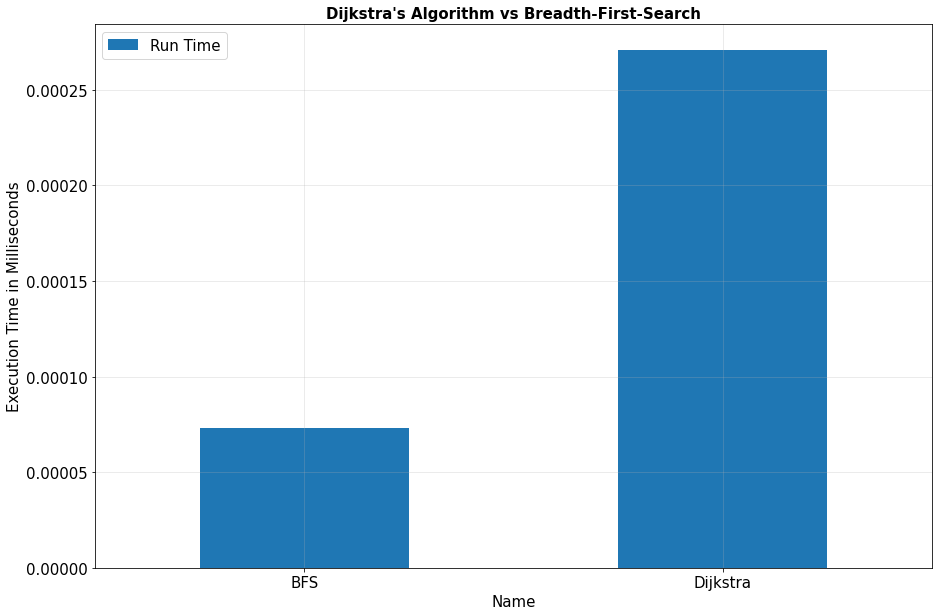

In [10]:

# plotting a bar plot to compare the runtime  BFS and Dijkstra's algoritm
ax = plt.rcParams["figure.figsize"] = (15,10)

ax = table.plot.bar(x= "Name", y = "Run Time",fontsize = 15)
ax.grid(alpha = 0.3)
ax.set_xlabel("Name", fontdict={'fontsize':15})
ax.set_ylabel("Execution Time in Milliseconds", fontdict={'fontsize':15})
ax.set_title("Dijkstra's Algorithm vs Breadth-First-Search",fontweight="bold", size=15)
ax.set_xticklabels(table["Name"] ,rotation=360)
ax.legend(loc=2, fontsize=15)

plt.show(ax)

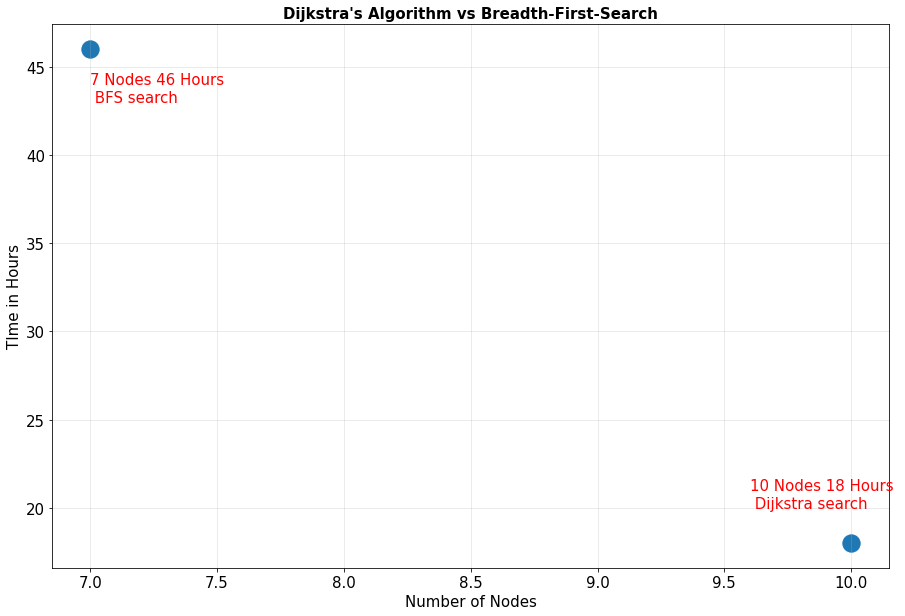

In [11]:
# plot scatter plot to compare BFS and Dikstra shortest path efficency 
ax1 = plt.rcParams["figure.figsize"] = (15,10)

ax1 = table.plot.scatter(x= "Number_of_nodes", y = "Hours",fontsize = 15, s =300)
ax1.grid(alpha = 0.3)
ax1.text(7, 43, '7 Nodes 46 Hours \n BFS search ', fontsize=15,      color='red')
ax1.text(9.6, 20, '10 Nodes 18 Hours \n Dijkstra search', fontsize=15,      color='red')
ax1.set_xlabel("Number of Nodes", fontdict={'fontsize':15})
ax1.set_ylabel("TIme in Hours", fontdict={'fontsize':15})
ax1.set_title("Dijkstra's Algorithm vs Breadth-First-Search",fontweight="bold", size=15)
#ax.set_xticklabels(table["Hours"] ,rotation=360)
#ax.legend(loc=2, fontsize=15)

plt.show(ax1)

# Discussion and Executive Summary

The graph and table above show that BFS found a much shorter path to the destination in terms of number of stops, resulting in only 7 stops/nodes (including start and end stop), but it took 46 Hours. Dijkstra's Algorithm took 10 stops (including start and end stop), but it took 18 Hours, which is the fastest time. 

The is not a fair comparison as BFS is meant for an unweighted graph and provides the shortest path and Dijkstra's Algorithm is meant for a weighted graph with all positive weights and provides the shortest distance.

Dijkstra's time complexity is O ( V + E l o g V ) and Breadth-first search (BFS) time complexity of O(V +E). V and E represent vertices (Nodes) and edges in the graph, respectively.

Breadth-first search is just like Dijkstra's algorithm with all edge weights equal to 1. Dijkstra's algorithm is just like breadth-first search that respects edge costs and takes longer because it has to sort the edges.

As a data engineer, it is essential to understand the purpose of  BFS and Dijkstra's algorithm. BFS should be used if all weights or distances between nodes are identical or don't exist, as it is a faster algorithm.  Dijkstra's algorithm should be used if weights/distance along the edges are or can be different. Dijkstra's algorithm uses edge weight to find the optimal path.
